In [226]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read csv file
cases = pd.read_csv("311_Cases.csv", sep = ",", dtype = "str")

# Drop extra columns
cases = cases.drop(cases.columns[range(20,47)], axis = 1)



####### Date Columns #####
date_columns = ["Opened", "Closed", "Updated"]

# Convert specified columns into datetime format
cases[date_columns] = cases[date_columns].apply(pd.to_datetime, format = "%m/%d/%Y %I:%M:%S %p")

# Find Closed - Opened in hours
time_elapsed = (cases["Closed"] - cases["Opened"])/np.timedelta64(1, 'h')

# Insert Time Elapsed into cases df
cases.insert(3, "Time Elapsed", time_elapsed)

cases = cases.dropna()

cases

,CaseID,Opened,Closed,Time Elapsed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,...,Address,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
5,11866505,2019-12-27 12:06:55,2020-05-15 10:23:01,3358.268333,2020-05-15 10:23:01,Closed,Case Resolved - case is resolved,DPT SignShop Queue,Sign Repair,Sign - Faded,...,"174 NAGLEE AVE, SAN FRANCISCO, CA, 94112",NAGLEE AVE,11,Outer Mission,INGLESIDE,37.712975,-122.447778333333,"(37.712975, -122.44777833)",Mobile/Open311,http://mobile311.sfgov.org/reports/11866505/ph...
7,11866514,2019-12-27 12:08:15,2019-12-27 15:00:48,2.875833,2019-12-27 15:00:48,Closed,Case Resolved - WASTE NOT FOUND,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,...,"3101 17TH ST, SAN FRANCISCO, CA, 94110",17TH ST,9,Mission,MISSION,37.7636884,-122.4152514,"(37.7636884, -122.4152514)",Mobile/Open311,http://mobile311.sfgov.org/reports/11866514/ph...
8,11866507,2019-12-27 12:07:17,2019-12-27 22:15:58,10.144722,2019-12-27 22:15:58,Closed,Case is a Duplicate - Request is a duplicate a...,DPW Ops Queue,Graffiti,Graffiti on Fire_Police_Callbox,...,Intersection of ELLINGTON AVE and NAGLEE AVE,ELLINGTON AVE,11,Outer Mission,INGLESIDE,37.71222,-122.446853333333,"(37.71222, -122.44685333)",Mobile/Open311,http://mobile311.sfgov.org/reports/11866507/ph...
10,11866530,2019-12-27 12:10:00,2020-05-15 09:31:24,3357.356667,2020-05-15 09:31:24,Closed,Case Resolved - not missing tree it is a lands...,DPW Ops Queue,Tree Maintenance,Trees - Tree_Other,...,"118 DOLORES ST, SAN FRANCISCO, CA, 94103",DOLORES ST,8,Mission Dolores,MISSION,37.767568034096,-122.426817717513,"(37.76756803, -122.42681772)",Mobile/Open311,http://mobile311.sfgov.org/reports/11866530/ph...
12,11866573,2019-12-27 12:17:00,2019-12-27 13:11:00,0.900000,2019-12-27 13:11:00,Closed,Case Resolved,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,...,"601 CAPP ST, SAN FRANCISCO, CA, 94110",CAPP ST,9,Mission,MISSION,37.757046161285,-122.417728823098,"(37.75704616, -122.41772882)",Mobile/Open311,http://mobile311.sfgov.org/reports/11866573/ph...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,12651171,2020-07-15 07:21:41,2020-07-15 15:57:45,8.601111,2020-07-15 15:57:45,Closed,Case Resolved - Pickup completed.,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,...,"348 LEXINGTON ST, SAN FRANCISCO, CA, 94110",LEXINGTON ST,9,Mission,MISSION,37.757740757459,-122.42053910813,"(37.75774076, -122.42053911)",Mobile/Open311,http://mobile311.sfgov.org/reports/12651171/ph...
1991,12651169,2020-07-15 07:21:00,2020-07-15 14:42:02,7.350556,2020-07-15 14:42:02,Closed,Case Resolved - Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,...,"3248 21ST ST, SAN FRANCISCO, CA, 94110",21ST ST,9,Mission,MISSION,37.757103905785,-122.419986156638,"(37.75710391, -122.41998616)",Mobile/Open311,http://mobile311.sfgov.org/reports/12651169/ph...
1992,12651166,2020-07-15 07:20:00,2020-07-15 12:17:00,4.950000,2020-07-15 12:17:00,Closed,Case Resolved,DPW Ops Queue,Street and Sidewalk Cleaning,Medical Waste,...,"347 CASTRO ST, SAN FRANCISCO, CA, 94114 (Virtual)",CASTRO ST,8,Duboce Triangle,PARK,37.763192994702,-122.43513369804,"(37.76319299, -122.4351337)",Mobile/Open311,http://mobile311.sfgov.org/reports/12651166/ph...
1994,12311667,2020-04-10 15:54:00,2020-04-11 12:03:04,20.151111,2020-04-11 12:03:04,Closed,Case Resolved,DPW Ops Queue,Graffiti,Graffiti on Sidewalk_in_front_of_property,...,"2177 MARKET ST, SAN FRANCISCO, CA, 94114",MARKET ST,8,Mission Dolores,MISSION,37.766196089287,-122.430293879886,"(37.76619609, -122.43029388)",Mobile/Open311,http://mobile311.sfgov.org/reports/12311667/ph...


In [227]:
#Q4. Predict how long it takes for cases to be closed based on category of case
cases_q4 = cases.drop(cases.columns[range(11,20)], axis = 1)
cases_q4 = cases_q4.drop(['CaseID', 'Status Notes', 'Responsible Agency', 'Request Details', 'Media URL', 'Request Type'], axis = 1)
cases_q4

,Opened,Closed,Time Elapsed,Updated,Status,Category
5,2019-12-27 12:06:55,2020-05-15 10:23:01,3358.268333,2020-05-15 10:23:01,Closed,Sign Repair
7,2019-12-27 12:08:15,2019-12-27 15:00:48,2.875833,2019-12-27 15:00:48,Closed,Street and Sidewalk Cleaning
8,2019-12-27 12:07:17,2019-12-27 22:15:58,10.144722,2019-12-27 22:15:58,Closed,Graffiti
10,2019-12-27 12:10:00,2020-05-15 09:31:24,3357.356667,2020-05-15 09:31:24,Closed,Tree Maintenance
12,2019-12-27 12:17:00,2019-12-27 13:11:00,0.900000,2019-12-27 13:11:00,Closed,Street and Sidewalk Cleaning
...,...,...,...,...,...,...
1990,2020-07-15 07:21:41,2020-07-15 15:57:45,8.601111,2020-07-15 15:57:45,Closed,Street and Sidewalk Cleaning
1991,2020-07-15 07:21:00,2020-07-15 14:42:02,7.350556,2020-07-15 14:42:02,Closed,Street and Sidewalk Cleaning
1992,2020-07-15 07:20:00,2020-07-15 12:17:00,4.950000,2020-07-15 12:17:00,Closed,Street and Sidewalk Cleaning
1994,2020-04-10 15:54:00,2020-04-11 12:03:04,20.151111,2020-04-11 12:03:04,Closed,Graffiti


In [228]:
#Get dummies
category = pd.get_dummies(cases_q4['Category'],drop_first=True)
cases_q4 = pd.concat([cases_q4,category,request],axis=1)
cases_q4 = cases_q4.drop(['Category', 'Closed', 'Opened', 'Updated', 'Status'], axis = 1)
cases_q4

,Time Elapsed,Blocked Street or SideWalk,Damaged Property,Encampments,General Request - MTA,General Request - PUBLIC WORKS,Graffiti,Illegal Postings,Parking Enforcement,Rec and Park Requests,...,Streetlight - Light_Flickering_On_Off,Streetlight - Other,Transit_shelter_platform,Trees - Damaged_Tree,Trees - Damaging_Property,Trees - Overgrown_Tree,Trees - Tree_Other,complaint,other,request_for_service
5,3358.268333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2.875833,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10.144722,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3357.356667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,0.900000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,8.601111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1991,7.350556,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1992,4.950000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994,20.151111,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas import Series

In [241]:
X = cases_q4.loc[:,cases_q4.columns != 'Time Elapsed']
y = cases_q4['Time Elapsed']

In [244]:
#Splitting data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [243]:
#Fitting a Ridge Model
modelRidge = Ridge(normalize = True)
modelRidge.fit(X_train,y_train)
predRidge = modelRidge.predict(X_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(X_train, y_train))
print('Test accuracy:', modelRidge.score(X_test, y_test))
print('')

Coefficient of each feature: [-2.55139977e+02 -1.92355592e+02 -1.81389811e+02  1.38851203e+01
 -2.24052414e+02  4.05879200e+02 -2.44923214e+02 -2.70521194e+02
 -3.14559263e+00 -2.62340557e+02  9.87237331e+02  1.70260665e+03
  1.19110806e+03 -3.18526561e+02 -1.59564536e+02  2.94518554e+02
 -2.55139977e+02 -2.61950622e+02 -2.60533513e+02 -2.61447394e+02
 -2.43467443e+02 -1.78686172e+02  3.86573649e+03 -2.18678941e+02
 -1.56351955e+02 -1.92881393e+02 -8.85344048e+02 -2.61265503e+02
 -1.67583097e+02 -2.95427839e+02 -2.62340557e+02 -2.31984594e+02
 -3.68177131e+02  9.24442107e+02  7.84060712e+03 -5.83138716e+02
  4.17509109e+03 -5.96829621e+02 -4.56051622e+02 -2.36810912e+02
 -5.34294427e+02 -5.58162215e+02  0.00000000e+00 -5.50848740e+02
 -5.73659002e+02 -5.87705889e+02  1.08100285e+03 -5.73551847e+02
  9.26136403e+02 -4.48082064e+02 -2.23997916e+02 -2.54259810e+01
 -2.40860991e+02 -2.64316208e+02 -2.55128954e+02 -2.43141729e+02
 -2.27317154e+02 -7.19544736e+02 -2.62241348e+02 -3.32649007e

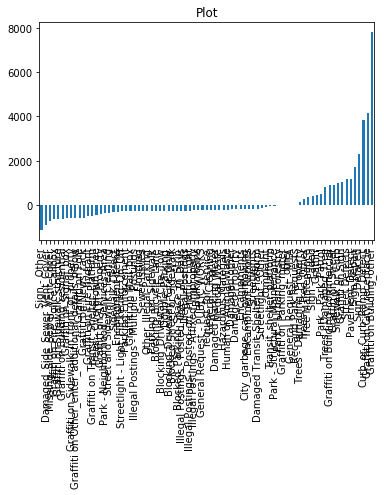

In [240]:
#Plot of variables vs coefficients
predictors = X_train.columns
coef = Series(modelRidge.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')


In [245]:

modelLasso = Lasso()
modelLasso.fit(X_train,y_train)
predLasso = modelLasso.predict(X_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(X_train, y_train))
print('Test accuracy:', modelLasso.score(X_test, y_test))
print('')

Coefficient of each feature: [   -0.            -0.             0.             0.
   -92.06925632     0.          -180.49702884  -248.96599377
    94.07411106    -0.           166.78593529  2401.21859214
  3487.13775154  -215.60297684     0.          1119.61938523
    -0.            -0.            -0.            -0.
   -25.84829321    38.64754379  8922.9370107     -0.
     0.            -0.            -0.            -0.
    24.2227826   -130.59798581    -0.            -0.
     0.          2712.55024785 16426.92833172  -127.20914648
  9124.64508712    -0.             0.           396.80126614
    -0.          -157.16837947     0.           -52.16951808
   -68.49853274    -0.          2372.80005322  -162.05052747
  2595.13721461     0.            -0.            -0.
    -0.            -0.            -0.            -0.
    -0.            -0.            -0.          -152.0225716
  1320.57763599   279.1995341      0.            -0.
   478.17038472   591.55902423  4332.23892933     0.
 -2161.

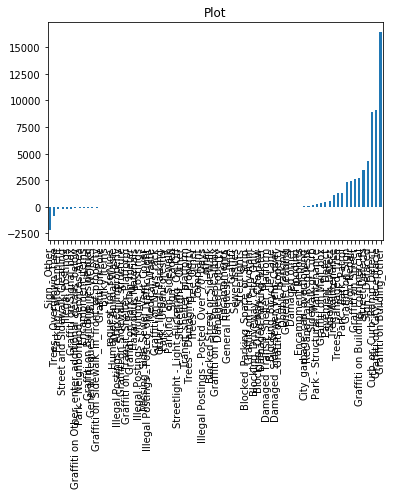

In [246]:
#Plot of variables vs coefficients
predictors = X_train.columns
coef = Series(modelLasso.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')

In [254]:
cases_q7 = cases.drop(cases.columns[range(15,20)], axis = 1)
cases_q7 = cases_q7.drop(cases.columns[range(1,14)], axis = 1)
cases_q7 = cases_q7.drop(['Media URL', 'CaseID'], axis = 1)
cases_q7

,Neighborhood
5,Outer Mission
7,Mission
8,Outer Mission
10,Mission Dolores
12,Mission
...,...
1990,Mission
1991,Mission
1992,Duboce Triangle
1994,Mission Dolores


In [265]:
#grouping by neighborhood

neighborhood = cases_q7.groupby('Neighborhood')
#neighborhood['freq'] = neighborhood.groupby('Neighborhood')['Neighborhood'].transform('count')
neighborhood
freq = neighborhood['Neighborhood'].value_counts()
freq
#print(neighborhood.first()[0:20])

neighborhood20 = neighborhood.first()[0:20]
print(freq)

#print(neighborhood.first()[21:40])


Neighborhood              Neighborhood            
Alamo Square              Alamo Square                 3
Anza Vista                Anza Vista                   1
Apparel City              Apparel City                 2
Aquatic Park / Ft. Mason  Aquatic Park / Ft. Mason     1
Ashbury Heights           Ashbury Heights              4
                                                      ..
Upper Market              Upper Market                 3
Visitacion Valley         Visitacion Valley           11
West Portal               West Portal                  1
Western Addition          Western Addition            18
Westwood Park             Westwood Park                9
Name: Neighborhood, Length: 101, dtype: int64


In [252]:
#making an array of household income and population
#from census.gov and niche.com
income = ['239545', '114431', '47826', '143693', '159518', '184335', '57829', '135460', '68720', '189645',
         '93227', '138825', '83166', '100567', '187106', '29772', '77114', '174797', '209321', '97742']


population = ['14570', '3064', '2450', '3775', '6170', '2327', '19202', '21633', '10291', '14847', 
              '2891', '5655', '10563', '7455', '3466', '11286', '11956', '3104', '4287', '19536']

neighborhood20['income'] = income
neighborhood20['pop'] = population
neighborhood = pd.DataFrame(neighborhood20)

neighborhood = neighborhood.rename_axis("Neighborhood").reset_index()
neighborhood


,Neighborhood,income,pop
0,Alamo Square,239545,14570
1,Anza Vista,114431,3064
2,Apparel City,47826,2450
3,Aquatic Park / Ft. Mason,143693,3775
4,Ashbury Heights,159518,6170
5,Balboa Terrace,184335,2327
6,Bayview,57829,19202
7,Bernal Heights,135460,21633
8,Bret Harte,68720,10291
9,Buena Vista,189645,14847


In [253]:
#Building Ridge Regression plots for frequency and income

Xinc = pd.DataFrame(neighborhood['income'])
y = neighborhood['freq']

Xinc_train, Xinc_test, y_train, y_test = train_test_split(Xinc, y, test_size=0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(Xinc_train,y_train)
predRidge = modelRidge.predict(Xinc_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(Xinc_train, y_train))
print('Test accuracy:', modelRidge.score(Xinc_test, y_test))
print('')


KeyError: 'freq'

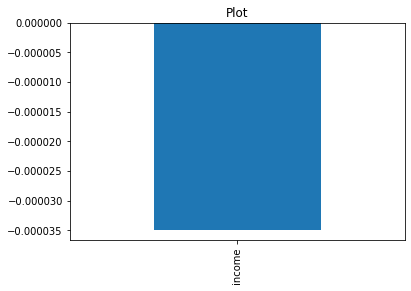

In [184]:
#Plot of variables vs coefficients
predictors = Xinc_train.columns
coef = Series(modelRidge.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')


In [185]:
#Fitting a Lasso Model
modelLasso = Lasso()
modelLasso.fit(Xinc_train,y_train)
predLasso = modelLasso.predict(Xinc_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(Xinc_train, y_train))
print('Test accuracy:', modelLasso.score(Xinc_test, y_test))
print('')

Coefficient of each feature: [-3.49413617e-05]
Training accuracy: 0.13350751608806943
Test accuracy: -2.0138323611188604



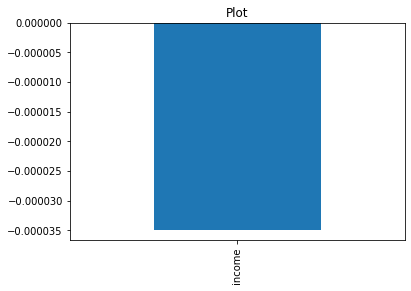

In [186]:
#Plot of variables vs coefficients
predictors = Xinc_train.columns
coef = Series(modelLasso.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')

In [168]:
#Building Ridge Regression plots for frequency and population

Xpoop = pd.DataFrame(neighborhood['pop'])
y = neighborhood['freq']

Xpop_train, Xpop_test, y_train, y_test = train_test_split(Xpop, y, test_size=0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(Xpop_train,y_train)
predRidge = modelRidge.predict(Xpop_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(Xpop_train, y_train))
print('Test accuracy:', modelRidge.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [0.00042385]
Training accuracy: 0.196239635053853
Test accuracy: -1.5459357290795186



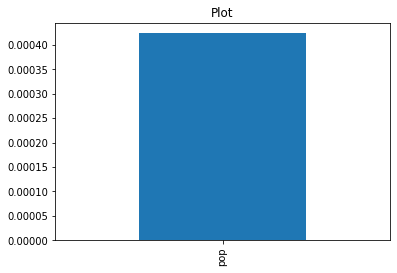

In [169]:
#Plot of variables vs coefficients
predictors = Xpop_train.columns
coef = Series(modelRidge.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')


In [170]:
#Fitting a Lasso Model
modelLasso = Lasso()
modelLasso.fit(Xpop_train,y_train)
predLasso = modelLasso.predict(Xpop_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(Xpop_train, y_train))
print('Test accuracy:', modelLasso.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [0.00042383]
Training accuracy: 0.19623963421759993
Test accuracy: -1.5458721234516308



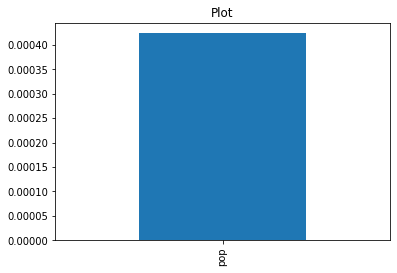

In [171]:
#Plot of variables vs coefficients
predictors = Xpop_train.columns
coef = Series(modelLasso.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')

In [192]:
#Building Ridge Regression plots for frequency vs population and income
XIncPop = neighborhood[['income', 'pop']]
y = neighborhood['freq']
XIncPop_train, XIncPop_test, y_train, y_test = train_test_split(XIncPop, y, test_size=0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(XIncPop_train,y_train)
predRidge = modelRidge.predict(XIncPop_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(XIncPop_train, y_train))
print('Test accuracy:', modelRidge.score(XIncPop_test, y_test))
print('')


Coefficient of each feature: [-3.16739152e-05  3.97808039e-04]
Training accuracy: 0.30520267212602314
Test accuracy: -2.4536144412590306



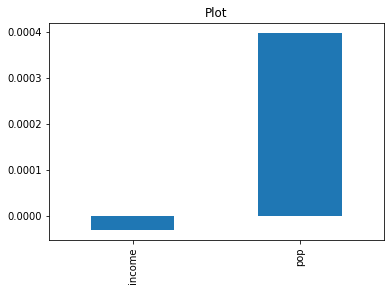

In [193]:
#Plot of variables vs coefficients
predictors = XIncPop_train.columns
coef = Series(modelRidge.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')

In [194]:
#Fitting a Lasso Model
modelLasso = Lasso()
modelLasso.fit(XIncPop_train,y_train)
predLasso = modelLasso.predict(XIncPop_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(XIncPop_train, y_train))
print('Test accuracy:', modelLasso.score(XIncPop_test, y_test))
print('')

Coefficient of each feature: [-3.16740149e-05  3.97780289e-04]
Training accuracy: 0.3052026712886917
Test accuracy: -2.4535404262153313



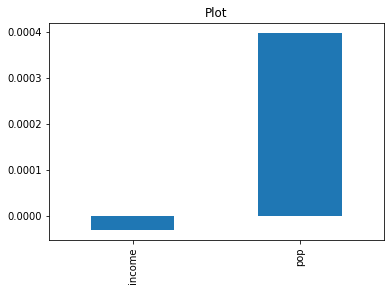

In [195]:
#Plot of variables vs coefficients
predictors = XIncPop_train.columns
coef = Series(modelLasso.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')

In [ ]:
#Split data into low, medium, high income and pop levels and plot pca
#freq and income, freq and pop, then freq and income + pop

In [ ]:
for i in neighborhood['income']:
    if neighborhood['income'][i] < 